Projekt bazuje na zbiorze danych Titanic ze strony https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/titanic         
1 rok II st. niestacjonarne IWB grupa 9. Skład grupy projektowej:
Michał Gębka 171911
Łukasz Różniewicz 172419
Błażej Dyjan 171908


Na potrzeby projektu przyjęto, że śmierć=0, a przeżycie=1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

Wczytane dane z pliku train.csv


In [8]:
list = pd.read_csv('titanic/train.csv', comment='#')



Analizowane są dane na temat pasażerów płynących statkiem. Jak widać na poniższej prezentacji na liście znajduje się 891 osób skategoryzowanych 12 kolumnami




In [66]:
list.shape

(891, 12)

Lista ta zawiera kolumny o nazwach takich jak między innymi: ID pasażera, klasa, imię i nazwisko, płeć, wiek i czy dana osoba przeżyła





In [68]:
print(list.columns.str.cat(sep=','))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [69]:

list.Sex = list.Sex.astype('category')
list.Sex.dtype

category

Poniższe wyliczenie pokazuje, że w większości pasażerami byli mężczyźni 577, kobiet 314 co również podpowiada kolumna "top" poniżej 




In [70]:
print(list.Sex.value_counts(),"\n\n")
print("Charakterystyka wieku:\n\n", list.Sex.describe())

male      577
female    314
Name: Sex, dtype: int64 


Charakterystyka wieku:

 count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Charakterysytka zgonów. 1-przeżył/a, 0-zginął/zginęła

In [16]:
print("Charakterystyka zgonów:\n\n", list.Survived.value_counts())

Charakterystyka zgonów:

 0    549
1    342
Name: Survived, dtype: int64


Średnią wieku pasażerów to około 30 lat, a mediana to 28.



In [71]:
print("Średnia=", list.Age.mean().round(2))
print("Mediana=", list.Age.median())

Średnia= 29.7
Mediana= 28.0


Warto również przyjrzeć się jaki był rozkład wieku pasażerów, a nie jedynie średnia i mediana. I tak widać, że oprócz omawianej wyżej średniej i mediany:
- 25% osób było poniżej 20 roku życia
- 25% osób było powyżej 38 roku życia
- wniosek z powyższych: połowa ludzi na statku była międz 20 a 28 rokiem życia
- najstarsza osoba miała 80 lat, a najmłodsza nie miała nawet roku!


In [72]:
list.Age.describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Warto sprawdzić jaki był stosunek umieralności do wieku. Przyjmijmy do tego podziały jak z wyliczeń wyżej, czyli: 
- grupa1: 0-20,
- grupa2: 21-37, 
- grupa3: >38

 
Warto zwrócić uwagę, że nie znamy wieku wszystkich osób. Policzono tylko dla tych znanych.


ILE OSÓB ZGINĘŁO W DANEJ GRUPIE WIEKOWEJ

GRUPA WIEKOWA 0-20:
98
GRUPA WIEKOWA 21-37:
185
GRUPA WIEKOWA >38:
111

WYKRES PRZEDSTAWIAJĄCY W JAKIEJ GRUPIE WIEKOWEJ BYŁO NAJWIĘCEJ ŚMIERCI


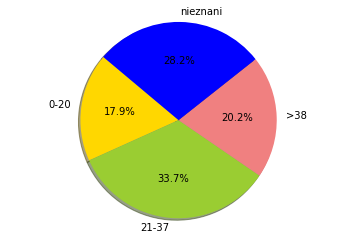

JAK ILOŚĆ ZGONÓW PRZEKŁADA SIĘ NA KONKRETNĄ GRUPĘ WIEKOWĄ

0-20


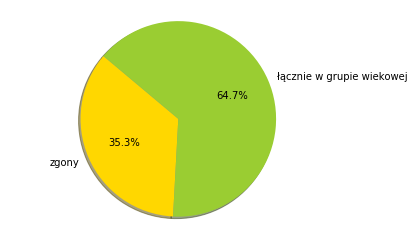


21-37


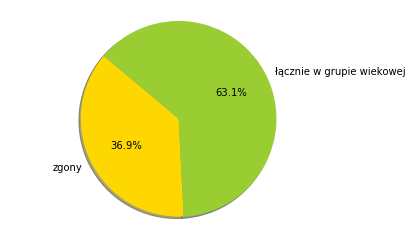


>38


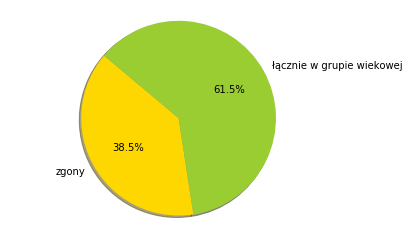

In [13]:
dane={'wiek': list.Age,'smierc': list.Survived}
df=pd.DataFrame(data=dane)
print("ILE OSÓB ZGINĘŁO W DANEJ GRUPIE WIEKOWEJ\n")
print("GRUPA WIEKOWA 0-20:")
young=len(df[(df["wiek"]<21) &(df["smierc"]==0)])
print(young)
print("GRUPA WIEKOWA 21-37:")
mid=len(df[(df["wiek"]>21) & (df["wiek"]<37) & (df["smierc"]==0) ])
print(mid)
print("GRUPA WIEKOWA >38:")
old=len(df[(df["wiek"]>38) &(df["smierc"]==0)])
print(old)
no_passangers=len(df)
dead=len(df[(df["smierc"]==0)])
unknow=dead-old-mid-young


labels='0-20', '21-37', '>38', 'nieznani'
sizes=[young, mid, old, unknow]
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
print("\nWYKRES PRZEDSTAWIAJĄCY W JAKIEJ GRUPIE WIEKOWEJ BYŁO NAJWIĘCEJ ŚMIERCI") 
plt.axis('equal')
plt.show()


print("JAK ILOŚĆ ZGONÓW PRZEKŁADA SIĘ NA KONKRETNĄ GRUPĘ WIEKOWĄ")
print("\n0-20")
all_young=len(df[(df["wiek"]<21)])
labels='zgony', 'łącznie w grupie wiekowej'
sizes=[young, all_young]
colors = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

print("\n21-37")
all_mid=len(df[(df["wiek"]>21)& (df["wiek"]<37)])
sizes=[mid, all_mid]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

print("\n>38")
all_old=len(df[(df["wiek"]>38)])
sizes=[old, all_old]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()



Godnym analizy jest również wpływ klasy, a co za tym idzie dogodniejszych miejsc na górze statku, lepszego dojścia do szalup ratunkowych, a zatem większej szansy na przetrwanie.

Zgodnie z domysłami i logiką pierwsza klasa, jako najlepiej usytuowana, miała największe szanse na przeżycie.


WYKRES PRZEDSTAWIAJĄCY W JAKIEJ KLASIE BYŁO NAJWIĘCEJ ZABITYCH (% per klasa)


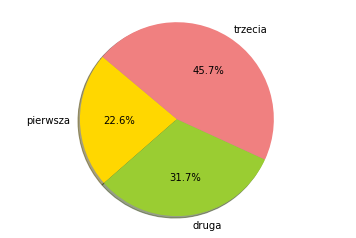

In [314]:
dane={'klasa': list.Pclass,'smierc': list.Survived}
df=pd.DataFrame(data=dane)
first=len(df[(df["klasa"]==1) &(df["smierc"]==0)])
first_all=len(df[(df["klasa"]==1)])
wsp_sm_first=int((100.*first/first_all))

second=len(df[(df["klasa"]==2) &(df["smierc"]==0)])
second_all=len(df[(df["klasa"]==2)])
wsp_sm_second=int((100.*second/second_all))

third_all=len(df[(df["klasa"]==3)])
third=len(df[(df["klasa"]==3) &(df["smierc"]==0)])
wsp_sm_third=int((100.*third/third_all))

wsp_sm=wsp_sm_first+wsp_sm_second+wsp_sm_third


labels='pierwsza', 'druga', 'trzecia'
sizes=[wsp_sm_first,wsp_sm_second, wsp_sm_third]
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
print("\nWYKRES PRZEDSTAWIAJĄCY W JAKIEJ KLASIE BYŁO NAJWIĘCEJ ZABITYCH (% per klasa)") 
plt.axis('equal')
plt.show()



W następnym kroku sprawdzana jest korelacja międzu wiekiem, śmiercią i klasą. Jak się okazuje z tabeli poniżej największy współczynnik jest dla klasy i śmierci. Wiek jest za to mało od niej uzależniony

           klasa    smierc      wiek
klasa   1.000000 -0.338481 -0.369226
smierc -0.338481  1.000000 -0.077221
wiek   -0.369226 -0.077221  1.000000


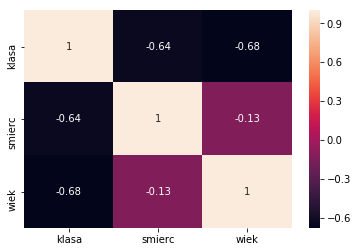

In [12]:
dane={'klasa': list.Pclass, 'smierc': list.Survived, 'wiek': list.Age }
df=pd.DataFrame(data=dane)
df.corr(method='pearson')
korelacja=df.corr(method='pearson')
print(korelacja)
sns.heatmap(korelacja.corr(), annot=True)
plt.show()

Pozostaje jeszcze kwestia rozkładu zgonów per płeć


WYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW KOBIETY/MĘŻCZYŹNI


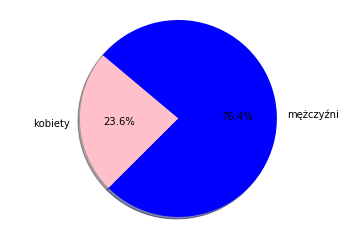


WYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW DLA MĘŻCZYZN


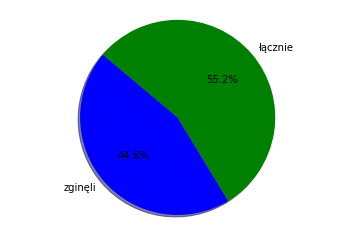


WYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW DLA KOBIET


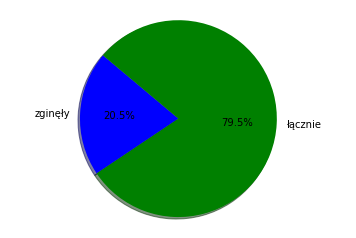

In [322]:
dane={'smierc': list.Survived,'plec': list.Sex }
df=pd.DataFrame(data=dane)
female_all=len(df[(df["plec"]=="female")])
female=len(df[(df["plec"]=="female") & (df["smierc"]==0)])
male_all=len(df[(df["plec"]=="male")])
male=len(df[(df["plec"]=="male") & (df["smierc"]==0)])

wsp_sm_female=int(100.*female/female_all)
wsp_sm_male=int(100.*male/male_all)

labels='kobiety', 'mężczyźni'
sizes=[wsp_sm_female,wsp_sm_male]
colors = ['pink', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
print("\nWYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW KOBIETY/MĘŻCZYŹNI") 
plt.axis('equal')
plt.show()

labels='zginęli', 'łącznie'
sizes=[male,male_all]
colors = ['blue', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
print("\nWYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW DLA MĘŻCZYZN") 
plt.axis('equal')
plt.show()

labels='zginęły', 'łącznie'
sizes=[female,female_all]
colors = ['blue', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
print("\nWYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW DLA KOBIET") 
plt.axis('equal')
plt.show()

Z powyższych przykładów można wywnioskować, że największe szanse przeżycia katastrofy miały osoby:
- z I klasy,
- będące w grupie wiekowej <21 lat,
- kobiety,


Poniżej wykres dla takiej grupy

Ile młodych panien z I klasy zginęło: 1
Ile było ogółem młodych panien z I klasy: 14

WYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW DLA MŁODYCH (<21) PANIEN Z PIERWSZEJ KLASY


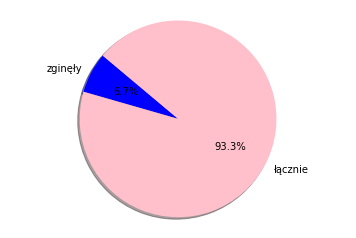

In [17]:
dane={'klasa': list.Pclass,'smierc': list.Survived, 'wiek': list.Age, 'plec': list.Sex }
df=pd.DataFrame(data=dane)
young_lady_dead=len(df[(df["plec"]=="female") & (df["smierc"]==0) & (df["klasa"]==1) & (df["wiek"]<21)])
young_ladies=len(df[(df["plec"]=="female") & (df["klasa"]==1) & (df["wiek"]<21)])
print("Ile młodych panien z I klasy zginęło:", young_lady_dead)
print("Ile było ogółem młodych panien z I klasy:",young_ladies)

labels='zginęły', 'łącznie'
sizes=[young_lady_dead,young_ladies]
colors = ['blue', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
print("\nWYKRES PRZEDSTAWIAJĄCY PROCENTOWY UDZIAŁ ZGONÓW DLA MŁODYCH (<21) PANIEN Z PIERWSZEJ KLASY") 
plt.axis('equal')
plt.show()

Z powyższej prezentacji wywnioskowano, że najwięsze szanse na przeżycie miały młode kobiety (poniżej 21 roku życia) płynące pierwszą klasą. Ogólnie osoby młode charakteryzowały się największą przeżywalnością. Udało się uratować nieco ponad dwa razy więcej kobiet niż mężczyzn.